In [ ]:
import pandas as pd
import numpy as np
import io
import sys
import os.path
import urllib.request
from tqdm import tqdm
from os import listdir
from PIL import Image
import glob
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
pd.set_option('display.max_colwidth', -1)
np.set_printoptions(threshold=sys.maxsize)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv("gdrive/MyDrive/Colab Notebooks/Intersect_dataset.csv",encoding='ISO-8859-1')
df.head(5)

,Unnamed: 0,imdbId,Title_x,Plot,Genre,Poster
0,0,114709,Toy Story,"A little boy named Andy loves to be in his room, playing with his toys, especially his doll named ""Woody"". But, what do the toys do when Andy is not with them, they come to life. Woody believes that he has life (as a toy) good. However, he must worry about Andy's family moving, and what Woody does not know is about Andy's birthday party. Woody does not realize that Andy's mother gave him an action figure known as Buzz Lightyear, who does not believe that he is a toy, and quickly becomes Andy's new favorite toy. Woody, who is now consumed with jealousy, tries to get rid of Buzz. Then, both Woody and Buzz are now lost. They must find a way to get back to Andy before he moves without them, but they will have to pass through a ruthless toy killer, Sid Phillips.",Animation|Adventure|Comedy,"https://images-na.ssl-images-amazon.com/images/M/MV5BMDU2ZWJlMjktMTRhMy00ZTA5LWEzNDgtYmNmZTEwZTViZWJkXkEyXkFqcGdeQXVyNDQ2OTk4MzI@._V1_UX182_CR0,0,182,268_AL_.jpg"
1,1,113497,Jumanji,"After being trapped in a jungle board game for 26 years, a Man-Child wins his release from the game. But, no sooner has he arrived that he is forced to play again, and this time sets the creatures of the jungle loose on the city. Now it is up to him to stop them.",Action|Adventure|Family,"https://images-na.ssl-images-amazon.com/images/M/MV5BZTk2ZmUwYmEtNTcwZS00YmMyLWFkYjMtNTRmZDA3YWExMjc2XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UY268_CR10,0,182,268_AL_.jpg"
2,2,113228,Grumpier Old Men,"Things don't seem to change much in Wabasha County: Max and John are still fighting after 35 years, Grandpa still drinks, smokes, and chases women , and nobody's been able to catch the fabled ""Catfish Hunter"", a gigantic catfish that actually smiles at fishermen who try to snare it. Six months ago John married the new girl in town (Ariel), and people begin to suspect that Max might be missing something similar in his life. The only joy Max claims is left in his life is fishing, but that might change with the new owner of the bait shop.",Comedy|Romance,"https://images-na.ssl-images-amazon.com/images/M/MV5BMjQxM2YyNjMtZjUxYy00OGYyLTg0MmQtNGE2YzNjYmUyZTY1XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UX182_CR0,0,182,268_AL_.jpg"
3,3,114885,Waiting to Exhale,"This story based on the best selling novel by Terry McMillan follows the lives of four African-American women as they try to deal with their very lives. Friendship becomes the strongest bond between these women as men, careers, and families take them in different directions. Often light-hearted this movie speaks about some of the problems and struggles the modern women face in today's world.",Comedy|Drama|Romance,"https://images-na.ssl-images-amazon.com/images/M/MV5BMTczMTMyMTgyM15BMl5BanBnXkFtZTcwOTc4OTQyMQ@@._V1_UY268_CR4,0,182,268_AL_.jpg"
4,4,113041,Father of the Bride Part II,"In this sequel to ""Father of the Bride"", George Banks must accept the reality of what his daughter's ascension from daughter to wife, and now, to mother means when placed into perspective against his own stage of life. As the comfortable family unit starts to unravel in his mind, a rapid progression into mid-life crisis is in his future. His journey to regain his youth acts as a catalyst for a kind of ""rebirth"" of his attitude on life when he and his wife, Nina, find how their lives are about to change as well.",Comedy|Family|Romance,"https://images-na.ssl-images-amazon.com/images/M/MV5BOTEyNzg5NjYtNDU4OS00MWYxLWJhMTItYWU4NTkyNDBmM2Y0XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UX182_CR0,0,182,268_AL_.jpg"


In [ ]:
df.shape

(4596, 6)

In [ ]:
check_nan_in_df = df.isnull().values.any()
print (check_nan_in_df)

True


In [ ]:
#Remove NaN valued entries
df= df.dropna(how='any')
df.shape

(4591, 6)

In [ ]:
#Method 1 to download images

not_found = []
for index, row in tqdm(df.iterrows()):
    
    url = row['Poster']
    imdb_id = row['imdbId']
    
    file_path = "gdrive/MyDrive/Posters/" + str(imdb_id) + ".jpg"
    
    try:
        response = urllib.request.urlopen(url)
        data = response.read()
        file = open(file_path, 'wb')
        file.write(bytearray(data))
        file.close()
    except:
        not_found.append(imdb_id)
        
print("Number of posters not found = ", len(not_found))
print("Following IMDB_ID posters were not found::", not_found)

4591it [05:10, 14.80it/s]

Number of posters not found =  534
Following IMDB_ID posters were not found:: [114709, 113497, 113228, 114885, 113041, 113277, 114319, 112302, 114576, 113189, 112346, 112896, 112453, 113987, 112760, 112641, 114388, 113101, 112281, 113845, 113161, 112722, 112401, 114168, 113627, 114057, 114011, 114117, 112682, 115012, 112792, 114746, 112431, 112637, 112818, 112286, 113442, 112697, 112749, 114279, 112819, 114272, 113855, 114681, 113347, 114369, 114148, 114916, 114814, 113819, 110299, 112499, 113158, 113321, 110877, 112714, 113419, 116260, 113862, 116126, 118002, 115683, 116839, 113149, 113118, 116367, 113010, 113537, 113828, 115644, 114367, 113973, 112744, 116731, 112445, 114660, 112379, 114039, 113612, 112365, 118158, 116151, 115697, 113972, 117002, 114825, 115639, 115759, 113403, 113247, 111173, 113283, 115907, 115734, 117102, 118040, 116483, 112579, 117110, 112646, 112573, 113326, 115645, 113774, 112373, 115033, 116606, 114536, 106473, 103859, 109424, 114808, 116324, 110647, 114131, 1

In [ ]:
#not_found = [114709, 113497, 113228, 114885, 113041, 113277, 114319, 112302, 114576, 113189, 112346, 112896, 112453, 113987, 112760, 112641, 114388, 113101, 112281, 113845, 113161, 112722, 112401, 114168, 113627, 114057, 114011, 114117, 112682, 115012, 112792, 114746, 112431, 112637, 112818, 112286, 113442, 112697, 112749, 114279, 112819, 114272, 113855, 114681, 113347, 114369, 114148, 114916, 114814, 113819, 110299, 112499, 113158, 113321, 110877, 112714, 113419, 116260, 113862, 116126, 118002, 115683, 116839, 113149, 113118, 116367, 113010, 113537, 113828, 115644, 114367, 113973, 112744, 116731, 112445, 114660, 112379, 114039, 113612, 112365, 118158, 116151, 115697, 113972, 117002, 114825, 115639, 115759, 113403, 113247, 111173, 113283, 115907, 115734, 117102, 118040, 116483, 112579, 117110, 112646, 112573, 113326, 115645, 113774, 112373, 115033, 116606, 114536, 106473, 103859, 109424, 114808, 116324, 110647, 114131, 112364, 113107, 113451, 116130, 113756, 118055, 115685, 112585, 112442, 112342, 112461, 112427, 109093, 112384, 114287, 112288, 112462, 112495, 112541, 109370, 112642, 112688, 112715, 112740, 109508, 112851, 112857, 112864, 112887, 113044, 113071, 113114, 113243, 113464, 113481, 113492, 113500, 113540, 113677, 113690, 107447, 113729, 113749, 113820, 110604, 110620, 113957, 113986, 114095, 114194, 114241, 114323, 114345, 114436, 114478, 114496, 114508, 114558, 114666, 114663, 114702, 114682, 114781, 114798, 114805, 114887, 114898, 114928, 109340, 111579, 110882, 112471, 112508, 112438, 112571, 112757, 112643, 112679, 109445, 112883, 109635, 109676, 109579, 109758, 113028, 109771, 113538, 110367, 110538, 113808, 114151, 110413, 108394, 111161, 114888, 114857, 109040, 109484, 109830, 113305, 105226, 111756, 106226, 106489, 106519, 109443, 109480, 109783, 112966, 107151, 107207, 110265, 107413, 107468, 107497, 107818, 108000, 105032, 108065, 111201, 108162, 111418, 108333, 108358, 108399, 108515, 110259, 109403, 110363, 117381, 115509, 115956, 117104, 117774, 113270, 113568, 116905, 118113, 115632, 119214, 116259, 102798, 117924, 116913, 120107, 115491, 101761, 104348, 109942, 120121, 105488, 102536, 101458, 116601, 103644, 101540, 115495, 117057, 119791, 117666, 117372, 115433, 115633, 119783, 104691, 116240, 116790, 119008, 118859, 120152, 118064, 119229, 118541, 119109, 118556, 118883, 118966, 120207, 119874, 119488, 120323, 119349, 119592, 118617, 119819, 120670, 118747, 120782, 119942, 119305, 120725, 120531, 139362, 116141, 140688, 119910, 104990, 111359, 120832, 120611, 128442, 102558, 120776, 118736, 120835, 120770, 119577, 120791, 120586, 120595, 119304, 120863, 119336, 110978, 145893, 128133, 124298, 139462, 159696, 120613, 125659, 120836, 118826, 120865, 149723, 158811, 120663, 144168, 130121, 105698, 164108, 126810, 157183, 169547, 127296, 108185, 119256, 137523, 185371, 144178, 105156, 185125, 105265, 155711, 144715, 160513, 124315, 106455, 107659, 105323, 104694, 134084, 105414, 171356, 101698, 108526, 101615, 160644, 102898, 104549, 112634, 156323, 154443, 219854, 120903, 104299, 105813, 205461, 111187, 130444, 233687, 234137, 216772, 187696, 202677, 146984, 180073, 181536, 200720, 149624, 181865, 190524, 212985, 177650, 192071, 240913, 203009, 244316, 212720, 255819, 228242, 245238, 163025, 123948, 261392, 234829, 273799, 272020, 246578, 249478, 283509, 259393, 120737, 280707, 106223, 295552, 102103, 266391, 108311, 110157, 254455, 295178, 171685, 283832, 310793, 298744, 101453, 297162, 283644, 293815, 118767, 308514, 266971, 285861, 100211, 117959, 304711, 327850, 103882, 110169, 317676, 165832, 242653, 109951, 102034, 100151, 102216, 150662, 167260, 104009, 296042, 360009, 113725, 105327, 146455, 258760, 189553, 115738, 377752, 368008, 101301, 385004, 102293, 104567, 106950, 110200, 169858, 235198, 269389, 372824, 353969, 372532, 418753, 378947, 384806, 384369, 337721, 372784, 405422, 380599, 367089, 369053, 443567, 386140, 414852, 416496, 414982, 425598, 421994, 397078, 364955, 449467, 457430, 419946, 478049, 489270, 450259, 808146, 468492, 822854, 329737, 499556, 923752, 478134, 452623, 762110, 762110, 780622, 780622, 467200, 467200, 813547, 813547, 452608, 110490, 923811, 806027, 863136, 107086, 860906, 100791, 383678, 455565, 395479, 131409, 860907, 831387, 246643, 173906]
print(not_found)
df_2 = df[~df['imdbId'].isin(not_found)]
df_2.shape

[114709, 113497, 113228, 114885, 113041, 113277, 114319, 112302, 114576, 113189, 112346, 112896, 112453, 113987, 112760, 112641, 114388, 113101, 112281, 113845, 113161, 112722, 112401, 114168, 113627, 114057, 114011, 114117, 112682, 115012, 112792, 114746, 112431, 112637, 112818, 112286, 113442, 112697, 112749, 114279, 112819, 114272, 113855, 114681, 113347, 114369, 114148, 114916, 114814, 113819, 110299, 112499, 113158, 113321, 110877, 112714, 113419, 116260, 113862, 116126, 118002, 115683, 116839, 113149, 113118, 116367, 113010, 113537, 113828, 115644, 114367, 113973, 112744, 116731, 112445, 114660, 112379, 114039, 113612, 112365, 118158, 116151, 115697, 113972, 117002, 114825, 115639, 115759, 113403, 113247, 111173, 113283, 115907, 115734, 117102, 118040, 116483, 112579, 117110, 112646, 112573, 113326, 115645, 113774, 112373, 115033, 116606, 114536, 106473, 103859, 109424, 114808, 116324, 110647, 114131, 112364, 113107, 113451, 116130, 113756, 118055, 115685, 112585, 112442, 112342,

(4062, 6)

In [ ]:
bad_images = []
for file in glob.glob("gdrive/MyDrive/Posters/*.jpg"):

    try:
        img = Image.open(file) # open image file
        img.verify() # verify its an image
    except (IOError, SyntaxError) as e:
        print('Bad file:', file) 

        bad_images.append(file)
        
print("Number of corrupt files:", len(bad_images))

Number of corrupt files: 0


In [ ]:
df_2.columns
df_2.head()

,Unnamed: 0,imdbId,Title_x,Plot,Genre,Poster
197,197,112854,Destiny Turns on the Radio,"Johnny Destiny burns into Las Vegas in his hot Plymouth RoadRunner, stopping only to pick up a stranger stranded in the desert. But then, things aren't always as they seem. Anything can happen in that town of many possibilities...especially since there's been some weird electrical disturbances. As the stranger, fresh out of prison, tries to put his life back together--to recover his money from an old bank heist and the girl he lost in doing the job--something keeps interfering with his plans. Is it fate...or just Destiny?",Crime|Comedy|Fantasy,"https://images-na.ssl-images-amazon.com/images/M/MV5BMTQzMDUwMDA0OF5BMl5BanBnXkFtZTYwNjY4NDg5._V1_UX182_CR0,0,182,268_AL_.jpg"
199,199,109642,Dolores Claiborne,A big-city reporter travels to the small town where her mother has been arrested for the murder of an elderly woman that she works for as a maid.,Crime|Drama|Mystery,"https://images-na.ssl-images-amazon.com/images/M/MV5BNzhkNjFlNDQtMDYxNy00NGU5LWE4YmItOWIyYzg5MTNmNzcxXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UX182_CR0,0,182,268_AL_.jpg"
200,200,109686,Dumb & Dumber,"Harry and Lloyd are two good friends who happen to be really stupid. The duo set out on a cross country trip from Providence to Aspen, Colorado to return a briefcase full of money to its rightful owner, a beautiful woman named Mary Swanson. After a trip of one mishap after another, the duo eventually make it to Aspen. But the two soon realize that Mary and her briefcase are the least of their problems.",Comedy,"https://images-na.ssl-images-amazon.com/images/M/MV5BZDQwMjNiMTQtY2UwYy00NjhiLTk0ZWEtZWM5ZWMzNGFjNTVkXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UY268_CR0,0,182,268_AL_.jpg"
201,201,111797,Eat Drink Man Woman,"Senior Master Chef Chu lives in a large house in Taipei with his three unmarried daughters, Jia-Jen, a chemistry teacher converted to Christianity, Jia-Chien, an airline executive, and Jia-Ning, a student who also works in a fast food restaurant. Life in the house revolves around the ritual of an elaborate dinner each Sunday, and the love lives of all the family members.",Comedy|Drama|Romance,"https://images-na.ssl-images-amazon.com/images/M/MV5BMTg5NTQxMjc5MV5BMl5BanBnXkFtZTcwMjYxODcxMQ@@._V1_UY268_CR3,0,182,268_AL_.jpg"
202,202,109759,Exotica,"This psychological thriller is true to its subjects as well as being complex, dynamic, and overly dramatic. How something so long ago, seemingly trivial, years later with more significant trauma, turns repressed emotions into a dysfunctional life and distorted thinking. This is all merged into a psychological menagerie that unfolds piece by piece to perfection.",Drama,"https://images-na.ssl-images-amazon.com/images/M/MV5BMGIxN2NiMDYtYjQ0YS00M2ViLTkzYTUtNDdhYWZmOTM0ZmJkXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UY268_CR0,0,182,268_AL_.jpg"


In [ ]:
df_3 = df_2[['imdbId','Title_x','Genre','Plot']]
print(df_3.shape)
df_3.head()

(4062, 4)


,imdbId,Title_x,Genre,Plot
197,112854,Destiny Turns on the Radio,Crime|Comedy|Fantasy,"Johnny Destiny burns into Las Vegas in his hot Plymouth RoadRunner, stopping only to pick up a stranger stranded in the desert. But then, things aren't always as they seem. Anything can happen in that town of many possibilities...especially since there's been some weird electrical disturbances. As the stranger, fresh out of prison, tries to put his life back together--to recover his money from an old bank heist and the girl he lost in doing the job--something keeps interfering with his plans. Is it fate...or just Destiny?"
199,109642,Dolores Claiborne,Crime|Drama|Mystery,A big-city reporter travels to the small town where her mother has been arrested for the murder of an elderly woman that she works for as a maid.
200,109686,Dumb & Dumber,Comedy,"Harry and Lloyd are two good friends who happen to be really stupid. The duo set out on a cross country trip from Providence to Aspen, Colorado to return a briefcase full of money to its rightful owner, a beautiful woman named Mary Swanson. After a trip of one mishap after another, the duo eventually make it to Aspen. But the two soon realize that Mary and her briefcase are the least of their problems."
201,111797,Eat Drink Man Woman,Comedy|Drama|Romance,"Senior Master Chef Chu lives in a large house in Taipei with his three unmarried daughters, Jia-Jen, a chemistry teacher converted to Christianity, Jia-Chien, an airline executive, and Jia-Ning, a student who also works in a fast food restaurant. Life in the house revolves around the ritual of an elaborate dinner each Sunday, and the love lives of all the family members."
202,109759,Exotica,Drama,"This psychological thriller is true to its subjects as well as being complex, dynamic, and overly dramatic. How something so long ago, seemingly trivial, years later with more significant trauma, turns repressed emotions into a dysfunctional life and distorted thinking. This is all merged into a psychological menagerie that unfolds piece by piece to perfection."


In [ ]:
image_list = []
for file in glob.glob("gdrive/MyDrive/Posters/*.jpg"):
    image_list.append(file)
    
print("Number of files found:", len(image_list))
    
#print("Number of files found:", len(image_list))

Number of files found: 3916


In [ ]:
df_3.to_csv("gdrive/MyDrive/MovieGenre_cleaned.csv", index = None)

In [ ]:
path="gdrive/MyDrive/"
df = pd.read_csv(path+"MovieGenre_cleaned.csv",encoding='ISO-8859-1')
df.head()

,imdbId,Title_x,Genre,Plot
0,112854,Destiny Turns on the Radio,Crime|Comedy|Fantasy,"Johnny Destiny burns into Las Vegas in his hot Plymouth RoadRunner, stopping only to pick up a stranger stranded in the desert. But then, things aren't always as they seem. Anything can happen in that town of many possibilities...especially since there's been some weird electrical disturbances. As the stranger, fresh out of prison, tries to put his life back together--to recover his money from an old bank heist and the girl he lost in doing the job--something keeps interfering with his plans. Is it fate...or just Destiny?"
1,109642,Dolores Claiborne,Crime|Drama|Mystery,A big-city reporter travels to the small town where her mother has been arrested for the murder of an elderly woman that she works for as a maid.
2,109686,Dumb & Dumber,Comedy,"Harry and Lloyd are two good friends who happen to be really stupid. The duo set out on a cross country trip from Providence to Aspen, Colorado to return a briefcase full of money to its rightful owner, a beautiful woman named Mary Swanson. After a trip of one mishap after another, the duo eventually make it to Aspen. But the two soon realize that Mary and her briefcase are the least of their problems."
3,111797,Eat Drink Man Woman,Comedy|Drama|Romance,"Senior Master Chef Chu lives in a large house in Taipei with his three unmarried daughters, Jia-Jen, a chemistry teacher converted to Christianity, Jia-Chien, an airline executive, and Jia-Ning, a student who also works in a fast food restaurant. Life in the house revolves around the ritual of an elaborate dinner each Sunday, and the love lives of all the family members."
4,109759,Exotica,Drama,"This psychological thriller is true to its subjects as well as being complex, dynamic, and overly dramatic. How something so long ago, seemingly trivial, years later with more significant trauma, turns repressed emotions into a dysfunctional life and distorted thinking. This is all merged into a psychological menagerie that unfolds piece by piece to perfection."


In [ ]:
df.shape

(4062, 4)

In [ ]:
# Since actually downloaded images data count is mismatched with the data count 
# Resolve mis-match
# Create new dataframe with paths of found images and fill with corresponding metadata from dataframe. 
image_paths = []
imdb_id = []
genres = []
titles = []
Plot = []

for file in glob.glob(path+"Posters/*.jpg"):
    
    #img_id = file.split('.')[0]    
    img_id = file[file.find('/')+17 : file.find('.')]
    title = df[df["imdbId"] == int(img_id)]["Title_x"].values[0]
    genre = df[df["imdbId"] == int(img_id)]["Genre"].values[0]
    plot = df[df["imdbId"] == int(img_id)]["Plot"].values[0]
    image_paths.append(file)
    imdb_id.append(img_id)
    genres.append(genre)
    titles.append(title)
    Plot.append(plot)
    
    
df_2 = pd.DataFrame({'imdbId': imdb_id, 'Genre': genres, 'Title': titles, 'Image_Paths': image_paths,'Plot':Plot})

In [ ]:
print(df_2.shape)
df_2.to_csv(path+"mov_gen_text.csv")
df_2.head()

(3916, 5)


,imdbId,Genre,Title,Image_Paths,Plot
0,112854,Crime|Comedy|Fantasy,Destiny Turns on the Radio,gdrive/MyDrive/Posters/112854.jpg,"Johnny Destiny burns into Las Vegas in his hot Plymouth RoadRunner, stopping only to pick up a stranger stranded in the desert. But then, things aren't always as they seem. Anything can happen in that town of many possibilities...especially since there's been some weird electrical disturbances. As the stranger, fresh out of prison, tries to put his life back together--to recover his money from an old bank heist and the girl he lost in doing the job--something keeps interfering with his plans. Is it fate...or just Destiny?"
1,109642,Crime|Drama|Mystery,Dolores Claiborne,gdrive/MyDrive/Posters/109642.jpg,A big-city reporter travels to the small town where her mother has been arrested for the murder of an elderly woman that she works for as a maid.
2,109686,Comedy,Dumb & Dumber,gdrive/MyDrive/Posters/109686.jpg,"Harry and Lloyd are two good friends who happen to be really stupid. The duo set out on a cross country trip from Providence to Aspen, Colorado to return a briefcase full of money to its rightful owner, a beautiful woman named Mary Swanson. After a trip of one mishap after another, the duo eventually make it to Aspen. But the two soon realize that Mary and her briefcase are the least of their problems."
3,111797,Comedy|Drama|Romance,Eat Drink Man Woman,gdrive/MyDrive/Posters/111797.jpg,"Senior Master Chef Chu lives in a large house in Taipei with his three unmarried daughters, Jia-Jen, a chemistry teacher converted to Christianity, Jia-Chien, an airline executive, and Jia-Ning, a student who also works in a fast food restaurant. Life in the house revolves around the ritual of an elaborate dinner each Sunday, and the love lives of all the family members."
4,109759,Drama,Exotica,gdrive/MyDrive/Posters/109759.jpg,"This psychological thriller is true to its subjects as well as being complex, dynamic, and overly dramatic. How something so long ago, seemingly trivial, years later with more significant trauma, turns repressed emotions into a dysfunctional life and distorted thinking. This is all merged into a psychological menagerie that unfolds piece by piece to perfection."


In [ ]:
columnsTitles = ['Image_Paths','imdbId','Genre','Title']
df_2 = df_2.reindex(columns=columnsTitles)
df_2.head()

,Image_Paths,imdbId,Genre,Title
0,gdrive/MyDrive/Posters/112854.jpg,112854,Crime|Comedy|Fantasy,Destiny Turns on the Radio
1,gdrive/MyDrive/Posters/109642.jpg,109642,Crime|Drama|Mystery,Dolores Claiborne
2,gdrive/MyDrive/Posters/109686.jpg,109686,Comedy,Dumb & Dumber
3,gdrive/MyDrive/Posters/111797.jpg,111797,Comedy|Drama|Romance,Eat Drink Man Woman
4,gdrive/MyDrive/Posters/109759.jpg,109759,Drama,Exotica


In [ ]:
df_2.shape

(3916, 4)

In [ ]:
df_2.to_csv(path+"MovieGenre_final.csv", index = None)

In [ ]:
# Investigating which of the Imdb_Id of the original csv, did not have a corresponding image

Original_ID_list = np.asarray(df['imdbId']).astype(int)
ID_with_images_found = np.asarray(df_2['imdbId']).astype(int)

#Original lengths of the two arrays 
print("ORIGINAL:", len(Original_ID_list))
print("TRIMMED:", len(ID_with_images_found))

#First compare the unique values of these two arrays
uniq1, counts1 = np.unique(Original_ID_list, return_counts=True)
print("#unique ID values in ORIGINAL:", len(uniq1))

uniq2, counts2 = np.unique(ID_with_images_found, return_counts=True)
print("#unique ID values in TRIMMED:", len(uniq2))

ORIGINAL: 4057
TRIMMED: 3916
#unique ID values in ORIGINAL: 3916
#unique ID values in TRIMMED: 3916


In [ ]:
non_unique_id = []
for i in range(len(counts1)):
    
    if (counts1[i]>1):
        #print(uniq1[i], "with freq=", counts1[i])
        non_unique_id.append(uniq1[i])
        
#print(non_unique_id)

#Find rows where the column value of imdb is among these non_unique_id values
for i in range(len(non_unique_id)):
    
    print(df.loc[df['imdbId'] == int(non_unique_id[i])])

      imdbId  Title_x  Genre
3590  106911  Fiorile  Drama
3591  106911  Fiorile  Drama
      imdbId       Title_x                Genre
3508  200465  The Bank Job  Crime|Drama|Romance
3509  200465  The Bank Job  Crime|Drama|Romance
      imdbId Title_x                   Genre
3402  211933  Awake   Crime|Mystery|Thriller
3403  211933  Awake   Crime|Mystery|Thriller
      imdbId                    Title_x  Genre
3460  241663  To the Left of the Father  Drama
3461  241663  To the Left of the Father  Drama
      imdbId                             Title_x                 Genre
3366  292963  Before the Devil Knows You're Dead  Crime|Drama|Thriller
3367  292963  Before the Devil Knows You're Dead  Crime|Drama|Thriller
      imdbId  ...                     Genre
3600  367882  ...  Action|Adventure|Fantasy
3601  367882  ...  Action|Adventure|Fantasy

[2 rows x 3 columns]
      imdbId         Title_x                  Genre
3414  368794  I'm Not There.  Biography|Drama|Music
3415  368794  I'm Not 

In [ ]:
#Therefore, we conclude that the duplicate IMDB IDs are now removed and we have only unique IDs with their 
#corresponding posters 
#Next : Organise_data with "MovieGenre_final.csv"

In [ ]:
df = pd.read_csv(path+"MovieGenre_final.csv",encoding='ISO-8859-1')
df.head()

,Image_Paths,imdbId,Genre,Title
0,gdrive/MyDrive/Posters/112854.jpg,112854,Crime|Comedy|Fantasy,Destiny Turns on the Radio
1,gdrive/MyDrive/Posters/109642.jpg,109642,Crime|Drama|Mystery,Dolores Claiborne
2,gdrive/MyDrive/Posters/109686.jpg,109686,Comedy,Dumb & Dumber
3,gdrive/MyDrive/Posters/111797.jpg,111797,Comedy|Drama|Romance,Eat Drink Man Woman
4,gdrive/MyDrive/Posters/109759.jpg,109759,Drama,Exotica


In [ ]:
df.shape

(3916, 4)

In [ ]:
# There exists a genre value for all images
Genre_list = df['Genre']
print(len(Genre_list))

3916


In [ ]:
# Breaks "Genre" into the constituting individual genres
def find_genres(genre):
    
    start = 0
    set_of_genre = []
    for i in range(len(genre)):
        
        k=0
        substring = ""
        if (genre[i]=='|'):
            substring = genre[start:i]
            start = i+1
            k = 1
        
        if(i==len(genre)-1):
            substring = genre[start:i+1]
            k = 1
            
        if (k==1):
            set_of_genre.append(substring)         
    
    return (set_of_genre)

In [ ]:
all_genre = []
Genre_list = df['Genre']

for i in range (len(Genre_list)):
    
    set_of_genre = find_genres(Genre_list[i])
    
    for j in range (len(set_of_genre)):
        all_genre.append(set_of_genre[j])
        
uniq, counts = np.unique(all_genre, return_counts=True)
print("Number of unique genres:", len(uniq))
print("Unique genres are:", uniq)
dict(zip(uniq, counts))

Number of unique genres: 22
Unique genres are: ['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Family' 'Fantasy' 'History' 'Horror' 'Music'
 'Musical' 'Mystery' 'Romance' 'Sci-Fi' 'Short' 'Sport' 'Thriller' 'War'
 'Western']


{'Action': 747,
 'Adventure': 605,
 'Animation': 235,
 'Biography': 246,
 'Comedy': 1633,
 'Crime': 712,
 'Documentary': 221,
 'Drama': 2068,
 'Family': 298,
 'Fantasy': 295,
 'History': 131,
 'Horror': 312,
 'Music': 168,
 'Musical': 23,
 'Mystery': 283,
 'Romance': 808,
 'Sci-Fi': 228,
 'Short': 25,
 'Sport': 113,
 'Thriller': 503,
 'War': 81,
 'Western': 17}

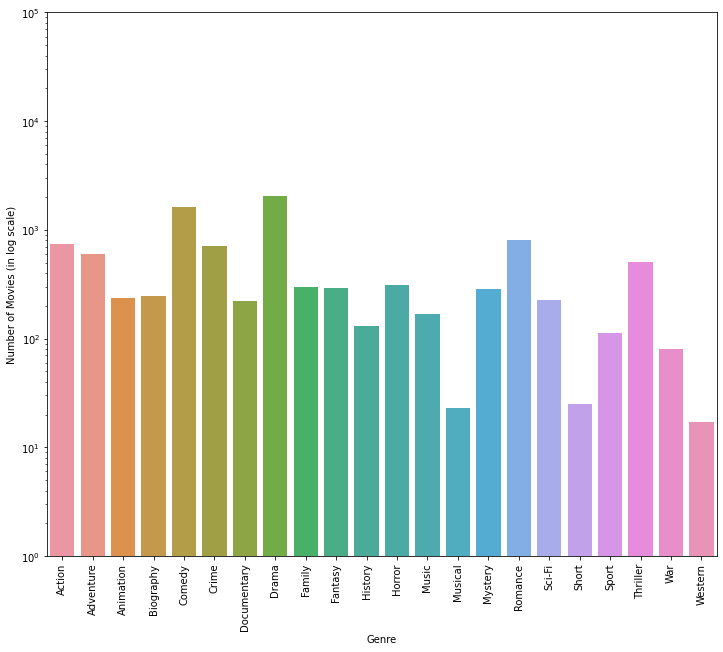

In [ ]:
df_movies_per_genre = pd.DataFrame({'Genre':uniq, 'Total': counts})
f, ax = plt.subplots(1, 1, figsize=(12, 10))
sns.barplot(data=df_movies_per_genre, x='Genre', y='Total', axes=ax)
ax.set(yscale='log', ylim=(1, 1e5), ylabel='Number of Movies (in log scale)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Prepare multi-hot-encoded-labels for the various genres
def multi_hot_encoded_labels(img_id, genre):
    
    col_names =  ['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History',
                  'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance',
                  'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']
    
    set_of_genre = find_genres(genre)
    
    row=[]
    row.append(img_id)
    
    for i in range(len(col_names)):
        
        found = 0
        for j in range (len(set_of_genre)):
            if (set_of_genre[j]==col_names[i]):
                found = 1
                break
        
        row.append(found)
    
    row.append(genre) #add the overall combined genre for record purposes
        
    return row  

In [ ]:
# Perform the encoding of the labels and save data in the format :
# Img-ID <multi-hot-encoded-labels> overall_genre

df = pd.read_csv("gdrive/MyDrive/"+"MovieGenre_final.csv",encoding="ISO-8859-1")
all_data = []

for index, row in tqdm(df.iterrows()):
    
    path = row['Image_Paths']
    genre = row['Genre']
    row = multi_hot_encoded_labels(path, genre)
    
    all_data.append(row)

col_names =  ['Img-paths', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History',
                  'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance',
                  'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western', 'Genre']

np.savetxt("gdrive/MyDrive/"+"Multi_hot_encoded_data.csv", np.asarray(all_data), fmt='%s', delimiter=" ")   
np.savetxt("gdrive/MyDrive/"+"Encoded_data_column_lookup.csv", np.asarray(col_names), fmt='%s', delimiter=" ")

3916it [00:00, 5960.06it/s]


In [ ]:
path="gdrive/MyDrive/"
df_encoded = pd.read_csv(path+"Multi_hot_encoded_data.csv", delimiter=" ", 
                  names =  ['Img-paths', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History',
                  'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance',
                  'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western', 'Genre'])

df_encoded.head()

,Img-paths,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,Genre
0,gdrive/MyDrive/Posters/112854.jpg,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Crime|Comedy|Fantasy
1,gdrive/MyDrive/Posters/109642.jpg,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Crime|Drama|Mystery
2,gdrive/MyDrive/Posters/109686.jpg,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Comedy
3,gdrive/MyDrive/Posters/111797.jpg,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Comedy|Drama|Romance
4,gdrive/MyDrive/Posters/109759.jpg,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Drama


In [ ]:
# To split into train / validation / test in the ratio 90 / 2 / 8%

df = pd.read_csv(path+"Multi_hot_encoded_data.csv", delimiter=" ")
random_seed = 50
train_df = df.sample(frac=0.90, random_state=random_seed) #Taking 80% of the data
tmp_df = df.drop(train_df.index)
test_df = tmp_df.sample(frac=0.80, random_state=random_seed) #Taking 10% of the remaining (after train is taken)
valid_df = tmp_df.drop(test_df.index)

print("Train_df=",len(train_df))
print("Val_df=",len(valid_df))
print("Test_df=",len(test_df))

np.savetxt(path+"Train.csv", train_df, fmt='%s', delimiter=" ")
np.savetxt(path+"Test.csv", test_df, fmt='%s', delimiter=" ")
np.savetxt(path+"Valid.csv", valid_df, fmt='%s', delimiter=" ")

#Numpy method
#train, validate, test = np.split(df_encoded.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])
#np.split will split at 60% of the length of the shuffled array, 
#then 80% of length (which is an additional 20% of data), thus leaving a remaining 20% of the data.

Train_df= 3524
Val_df= 78
Test_df= 313


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd 
import numpy as np 
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2
from keras import models
from keras import layers
from keras import optimizers
from PIL import Image
import sklearn
from sklearn.model_selection import train_test_split
from statistics import mean
from keras.models import load_model
path="gdrive/MyDrive/"

In [ ]:
def arrange_data(df):
    
    image_data = []
    img_paths = np.asarray(df.iloc[:, 0]) #First column is the image paths
    
    for i in tqdm(range(len(img_paths))):
        if img_paths[i]=="gdrive/MyDrive/Posters/79509.jpg": 
          continue  
        img = image.load_img(img_paths[i],target_size=(200,150,3))
        img = image.img_to_array(img)
        img = img/255
        image_data.append(img)
        
        
    
    X = np.array(image_data)
    Y = np.array(df.iloc[:,1:29])
    
    print("Shape of images:", X.shape)
    print("Shape of labels:", Y.shape)
    
    return X, Y

In [ ]:
print("Processing train..")
train_df = pd.read_csv(path+"Train.csv", delimiter=" ")
X_train, Y_train = arrange_data (train_df)

print("Processing valid..")
val_df = pd.read_csv(path+"Valid.csv", delimiter=" ")
X_val, Y_val = arrange_data (val_df)

Processing train..


100%|██████████| 3523/3523 [00:10<00:00, 325.09it/s]


Shape of images: (3523, 200, 150, 3)
Shape of labels: (3523, 28)
Processing valid..


100%|██████████| 77/77 [00:00<00:00, 346.26it/s]

Shape of images: (77, 200, 150, 3)
Shape of labels: (77, 28)


In [ ]:
num_classes = 28  

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(200,150,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 196, 146, 16)      1216      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 98, 73, 16)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 98, 73, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 94, 69, 32)        12832     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 47, 34, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 47, 34, 32)       

In [ ]:
#model.compile(loss='binary_crossentropy',
              #optimizer=keras.optimizers.Adagrad(),
              #metrics=['accuracy'])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=30, validation_data=(X_val, Y_val), batch_size=64)
model.save(path+'Model_6c.h5')

Epoch 1/30
56/56 [==============================] - 17s 100ms/step - loss: 0.4406 - accuracy: 0.0823 - val_loss: 0.3310 - val_accuracy: 0.2208
Epoch 2/30
56/56 [==============================] - 5s 90ms/step - loss: 0.2961 - accuracy: 0.1865 - val_loss: 0.2530 - val_accuracy: 0.2208
Epoch 3/30
56/56 [==============================] - 5s 90ms/step - loss: 0.2709 - accuracy: 0.2024 - val_loss: 0.2454 - val_accuracy: 0.2208
Epoch 4/30
56/56 [==============================] - 5s 90ms/step - loss: 0.2587 - accuracy: 0.2183 - val_loss: 0.2190 - val_accuracy: 0.2208
Epoch 5/30
56/56 [==============================] - 5s 91ms/step - loss: 0.2528 - accuracy: 0.2157 - val_loss: 0.2363 - val_accuracy: 0.2208
Epoch 6/30
56/56 [==============================] - 5s 90ms/step - loss: 0.2465 - accuracy: 0.2177 - val_loss: 0.2228 - val_accuracy: 0.2208
Epoch 7/30
56/56 [==============================] - 5s 90ms/step - loss: 0.2420 - accuracy: 0.2171 - val_loss: 0.2198 - val_accuracy: 0.2208
Epoch 8/30


In [ ]:
def accuracy_score(test_path, model_path):
    
    test_df = pd.read_csv(test_path, delimiter=" ")
    X_test, Y_test = arrange_data (test_df)

    model = load_model(model_path)

    pred = model.predict(np.array(X_test))

    count = 0
    for i in tqdm(range(len(pred))):
        value = 0
        
        first3_index = np.argsort(pred[i])[-3:]
        correct = np.where(Y_test[i] == 1)[0]
        
        for j in first3_index:
            if j in correct:
                value += 1
                
        if (value>0):
            count=count+1
                
    print("Images having atleast one genre correctly identified=",count)
    print("Total number of images =",len(pred))
    print("Accuracy = ", count/len(pred))

In [ ]:
accuracy_score(path+"Test.csv",path+"Model_6c.h5")

100%|██████████| 312/312 [00:00<00:00, 337.42it/s]


Shape of images: (312, 200, 150, 3)
Shape of labels: (312, 28)


100%|██████████| 312/312 [00:00<00:00, 14034.69it/s]

Images having atleast one genre correctly identified= 264
Total number of images = 312
Accuracy =  0.8461538461538461


In [ ]:
#Test for single image 
def find_genre(test_path, model_path):
    model = load_model(model_path) 
    img = image.load_img(test_path,target_size=(200,150,3))
    img = image.img_to_array(img)
    img = img/255
    prob = model.predict(img.reshape(1,200,150,3))

    top_3 = np.argsort(prob[0])[:-4:-1]

    column_lookups = pd.read_csv(path+"Encoded_data_column_lookup.csv", delimiter=" ")
    classes = np.asarray(column_lookups.iloc[1:29, 0])

    for i in range(3):
        print("{}".format(classes[top_3[i]])+" ({:.3})".format(prob[0][top_3[i]]))
    plt.imshow(img)

Family (0.534)
Crime (0.396)
Sci-Fi (0.228)


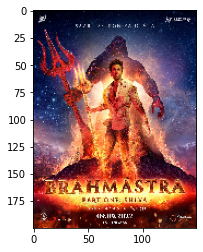

In [ ]:
find_genre(path+"Posters-images-test/brahmastra_test.jpg",path+'Model_6c.h5')

Family (0.544)
Crime (0.306)
Adult (0.253)


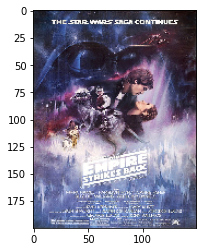

In [ ]:
find_genre(path+"Posters-images-test/star_wars_test.jpg",path+'Model_6c.h5')